In [1]:
from unet import simple_unet_model
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify

In [2]:
# Standard
import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Utils
import h5py

In [3]:
def get_model():
    return simple_unet_model(256,256,1)
model = get_model()

2022-06-22 12:34:05.729004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 12:34:05.818002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-06-22 12:34:05.818038: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-06-22 12:34:05.819239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

/home/kanji/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
f = h5py.File(r"../Dataset_list/image_test_dataset.hdf5", "r")

In [11]:
frames2ch = f["test 2ch frames"][:,:,:,:]
masks2ch = f["test 2ch masks"][:,:,:,:]

In [12]:
model.load_weights("../newModel/unet_2ch.h5")

In [14]:
model.evaluate(frames2ch,masks2ch,verbose=1)

4/4 [==============================] - 11s 2s/step - loss: -465.8182 - accuracy: 0.7109


[-465.81817626953125, 0.7108574509620667]

In [16]:
pred_train=model.predict(frames2ch,verbose=1)
pred_test=model.predict(masks2ch,verbose=1)

4/4 [==============================] - 9s 2s/step


In [17]:
pred_train_t = (pred_train > 0.5).astype(np.uint8)
pred_val_t = (pred_test > 0.5).astype(np.uint8)

In [18]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='gray')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('UltraSound Image')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Ground Truth')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Predicted')

    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Predicted binary')

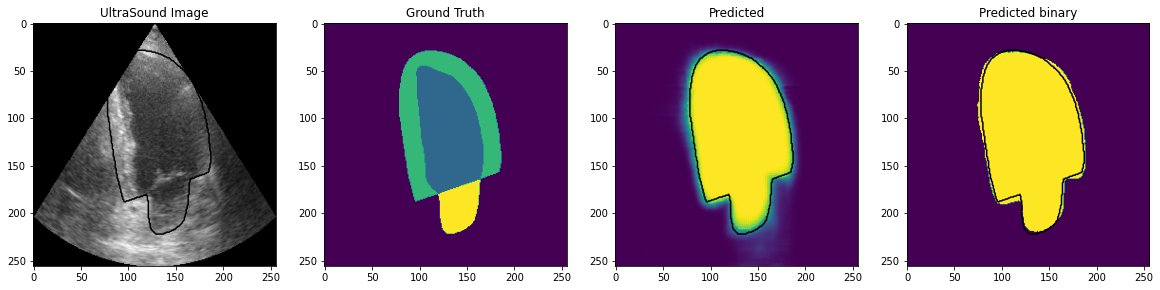

In [20]:
plot_sample(frames2ch,masks2ch, pred_train,pred_train_t, ix=50)


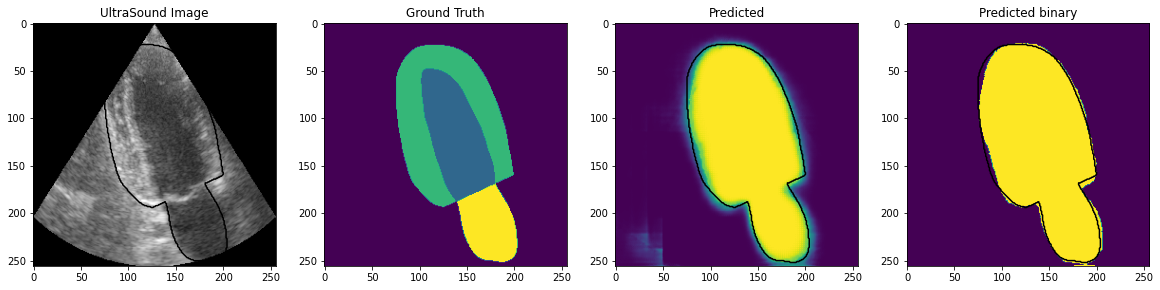

In [25]:
plot_sample(frames2ch,masks2ch, pred_train,pred_train_t, ix=1)

In [21]:
print("2CH DONE")

2CH DONE


In [4]:
f1 = h5py.File(r"/home/kanji/Desktop/Charlie/Projects/Ultrasound_segmentation_UNET-master/CAMUS/image_test_dataset.hdf5", "r")

In [5]:
frames4ch = f1["test 4ch frames"][:,:,:,:]
masks4ch = f1["test 4chgt frames"][:,:,:,:]

In [6]:
model.load_weights(r"/home/kanji/Desktop/Charlie/Projects/Ultrasound_segmentation_UNET-master/newmodel/unet_4ch.h5")

In [7]:
model.evaluate(frames4ch,masks4ch,verbose=1)

4/4 [==============================] - 4s 817ms/step - loss: -78.4241 - accuracy: 0.7310


[-78.42405700683594, 0.7310235500335693]

In [8]:
pred_train=model.predict(frames4ch,verbose=1)
pred_test=model.predict(masks4ch,verbose=1)

4/4 [==============================] - 4s 827ms/step


In [9]:
pred_train_t = (pred_train > 0.5).astype(np.uint8)
pred_val_t = (pred_test > 0.5).astype(np.uint8)

In [10]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='gray')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('UltraSound Image')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Ground Truth')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k')
    ax[2].set_title('Predicted')

    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k')
    ax[3].set_title('Predicted binary')

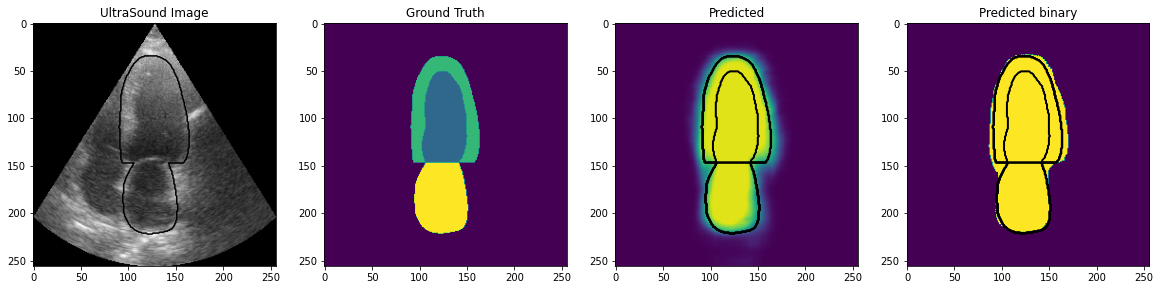

In [13]:
plot_sample(frames4ch,masks4ch, pred_train,pred_train_t, ix=75)